In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [3]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
df = yf.download("BTC-USD", start="2018-01-01", end="2025-01-01")

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_12244\3027890012.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2557.000000,2557.000000,2557.000000,2557.000000,2.557000e+03
mean,28085.636904,28677.221781,27406.235937,28056.369438,2.696024e+10
std,22139.594088,22595.357591,21608.671925,22105.805883,1.965527e+10
min,3236.761719,3275.377930,3191.303467,3236.274658,2.923670e+09
25%,8987.049805,9202.344727,8793.163086,8941.445312,1.380829e+10
50%,22206.792969,22613.685547,21460.087891,22156.406250,2.406287e+10
75%,42842.382812,43603.175781,41914.750000,42832.796875,3.536117e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2018-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2557 non-null   float64
 1   (High, BTC-USD)    2557 non-null   float64
 2   (Low, BTC-USD)     2557 non-null   float64
 3   (Open, BTC-USD)    2557 non-null   float64
 4   (Volume, BTC-USD)  2557 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 119.9 KB


In [9]:
df.isnull().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [10]:
df_cleaned = df[('Close', 'BTC-USD')].reset_index()

In [11]:
df_cleaned.head()

,Date,Close
,,BTC-USD
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [12]:
df_cleaned.columns = ['Date', 'Close']

In [13]:
df_cleaned.head()

,Date,Close
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [14]:
df1 = df_cleaned.copy()

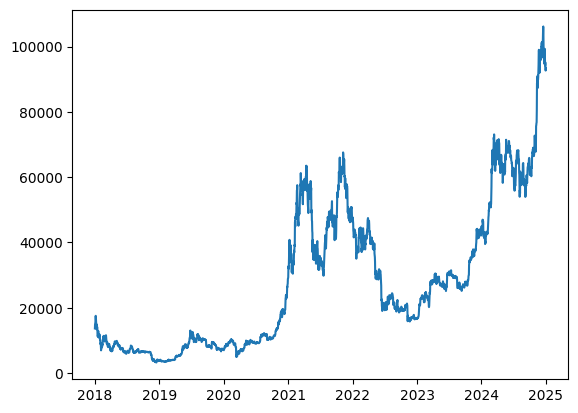

In [15]:
plt.plot(df1['Date'], df1['Close'])

In [16]:
from statsmodels.tsa.seasonal import STL

yearly seasonility check


In [18]:
YD = STL(df1['Close'], period=365).fit()

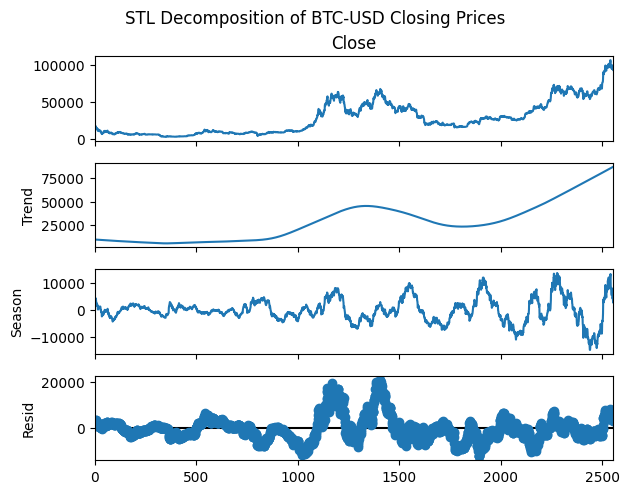

In [19]:
YD.plot()
plt.suptitle('STL Decomposition of BTC-USD Closing Prices', y=1.02)
plt.show()

motnthly seasonality check

In [20]:
MD = STL(df1['Close'], period=30).fit()

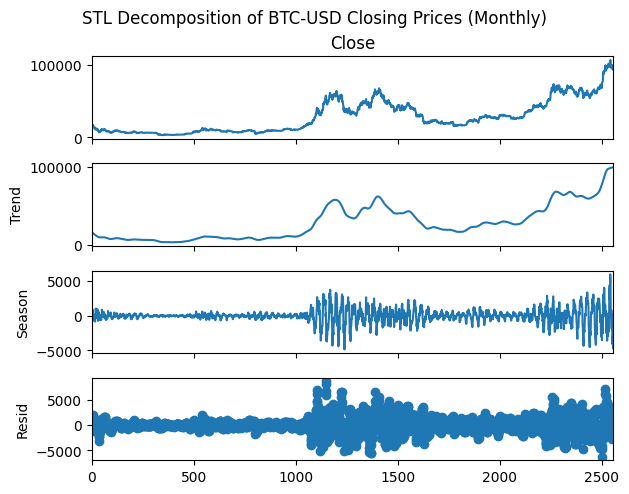

In [21]:
MD.plot()
plt.suptitle('STL Decomposition of BTC-USD Closing Prices (Monthly)', y=1.02)
plt.show()

In [17]:
df1.to_csv('btc_prices.csv', index=False)